# Clean Data

- Author: Wen Xin
- Description: This file is about cleaning data in week 7, most work is about filling NAN.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
#1. Add dummy variable to indicate if it’s fillin 

In [3]:
clean=pd.read_csv('data_cleaned.csv')

In [4]:
len(clean)

191855

In [5]:
clean['age_na']=np.where(clean['age']==-1,1,0)

In [6]:
clean['lastgap_na']=np.where(clean['lastgap']==100,1,0)
clean['avg_gap_na']=np.where(clean['avg_gap']==100,1,0)
clean['min_gap_na']=np.where(clean['min_gap']==100,1,0)
clean['max_gap_na']=np.where(clean['max_gap']==100,1,0)

In [8]:
# 8.所有time相关的fillna fill 500000
time_features=['overall_time_mean', 'update2create_time_mean', 'send2update_time_mean',\
               'overall_time_min', 'update2create_time_min', 'send2update_time_min',\
               'overall_time_max', 'update2create_time_max', 'send2update_time_max']

In [13]:
for f in time_features:
    print(f)
    print(clean[f].unique())
    clean[f+"_na"]=np.where(clean[f]==500000,1,0)

In [12]:
clean["overall_time_mean_na"].unique()

array([0])

In [162]:
clean.columns

Index(['order_sd', 'active_days', 'lastgap', 'avg_gap', 'min_gap', 'max_gap',
       'total_orders', 'w1_total_orders', 'w2_total_orders', 'w3_total_orders',
       'w4_total_orders', 'w5_total_orders', 'w6_total_orders',
       'w7_total_orders', 'total_couponworth', 'w1_total_couponworth',
       'w2_total_couponworth', 'w3_total_couponworth', 'w4_total_couponworth',
       'w5_total_couponworth', 'w6_total_couponworth', 'w7_total_couponworth',
       'label', 'first_order', 'last_order', 'accountLength',
       'overall_time_mean', 'update2create_time_mean', 'send2update_time_mean',
       'overall_time_min', 'update2create_time_min', 'send2update_time_min',
       'overall_time_max', 'update2create_time_max', 'send2update_time_max',
       'intime_rate', 'last_coupon_fee', 'last_send_type', 'order_nums',
       'city_id', 'sex', 'age', 'login_platform_b', 'app_version_b', 'age_na',
       'lastgap_na', 'avg_gap_na', 'min_gap_na', 'max_gap_na',
       'overall_time_mean_na', 'update

In [18]:
# this piece of code from one kaggle
# 看看有没有NAN什么的,Type Error说明没有NAN了！
import matplotlib.pyplot as plt
nan_value = clean.isnull().sum()
nan_value = nan_value[nan_value > 0]
nan_value.sort_values(inplace=True,ascending=False)
nan_value.plot.bar()

TypeError: Empty 'DataFrame': no numeric data to plot

In [80]:
clean.to_csv("data_cleaned_1.csv",index=False)

In [81]:
# Add principle component (pca) as new features

In [135]:
clean=pd.read_csv('data_cleaned.csv')

In [136]:
label=clean['label']

In [84]:
clean=clean.drop(['label'],axis=1)

In [85]:
import sklearn.decomposition as skd

In [86]:
clean.shape

(191855, 43)

In [111]:
pca = skd.PCA()

In [112]:
new_data = pca.fit_transform(clean)

In [113]:
new_data

array([[-1.28653255e+05, -1.86401492e+05, -1.26224580e+04, ...,
         1.64008617e-01, -3.01377123e-09,  1.27872626e-08],
       [-1.04047074e+05, -1.85396060e+05,  4.61782301e+04, ...,
         6.60846829e-02,  5.95089178e-09,  4.88105229e-09],
       [-1.22307005e+05, -1.86072180e+05,  3.09538681e+03, ...,
         3.69069561e-03, -3.95167747e-10, -5.17096972e-10],
       ...,
       [ 1.08978354e+06, -8.10033388e+04,  2.77248026e+04, ...,
        -1.72936504e-02,  3.71303536e-12,  1.92906665e-13],
       [-8.14947679e+04,  1.25704759e+05,  5.17391423e+04, ...,
        -1.02909244e-02,  4.38560371e-12, -3.49787491e-14],
       [-8.11338276e+04,  1.25650766e+05,  5.00108182e+04, ...,
        -4.94456731e-03,  4.60430108e-12, -1.96435489e-13]])

In [119]:
print(pca.n_components)

None


In [118]:
pca.explained_variance_ratio_

array([8.71524425e-01, 1.13205254e-01, 1.15275428e-02, 2.73692843e-03,
       6.24420408e-04, 1.96752223e-04, 1.47666718e-04, 2.13248055e-05,
       1.34320763e-05, 2.12089857e-06, 6.35662796e-08, 3.42720445e-08,
       1.48655833e-08, 7.47634058e-09, 4.51862035e-09, 3.72598362e-09,
       8.22020960e-10, 6.46442078e-10, 6.11082804e-10, 5.46753778e-10,
       3.86099090e-10, 3.66194908e-10, 3.38773737e-10, 2.64294515e-10,
       1.49835740e-10, 7.26391249e-11, 4.46352172e-11, 1.05684373e-11,
       7.05668702e-12, 5.76550810e-12, 5.08242097e-12, 4.14072689e-12,
       3.78812004e-12, 3.26951792e-12, 3.13417160e-12, 2.23941998e-12,
       1.52639396e-12, 1.29732448e-12, 4.47828727e-13, 2.65693928e-13,
       2.00355461e-14, 7.79017700e-33, 7.79017700e-33])

In [56]:
pca_model.explained_variance_

array([1.29592445e+11, 1.68332008e+10, 1.71410281e+09, 4.06971093e+08,
       9.28489956e+07, 2.92563249e+07, 2.19574926e+07, 3.17091938e+06,
       1.99729986e+06, 3.15369740e+05, 9.45206970e+03, 5.09612574e+03,
       2.21045703e+03, 1.11170408e+03, 6.71902065e+02, 5.54039926e+02,
       1.22231464e+02, 9.61235363e+01, 9.08657435e+01, 8.13002563e+01,
       5.74115008e+01, 5.44518228e+01, 5.03743966e+01, 3.92996129e+01,
       2.22800180e+01, 1.08011681e+01, 6.63709104e+00, 1.57148738e+00,
       1.04930315e+00, 8.57309643e-01, 7.55737123e-01, 6.15710711e-01,
       5.63279381e-01, 4.86165173e-01, 4.66039677e-01, 3.32993435e-01,
       2.26969113e-01, 1.92907332e-01, 6.65904686e-02, 3.95077004e-02,
       2.97921130e-03, 1.15837039e-21, 1.15837039e-21])

In [122]:
import matplotlib.pyplot as plt

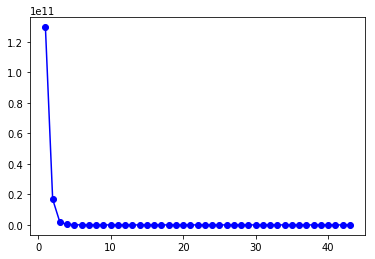

In [124]:
plt.plot(range(1,44),pca.explained_variance_,'b-o')

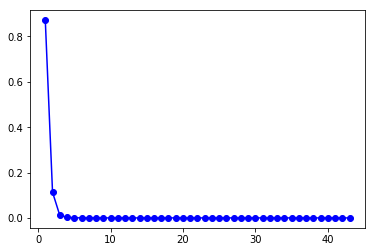

In [125]:
plt.plot(range(1,44),pca.explained_variance_ratio_,'b-o')

In [121]:
pd.DataFrame(new_data)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,-1.286533e+05,-186401.491722,-12622.457990,852.860985,200.624937,-47.535896,-467.507175,-660.353513,-210.601258,-60.671512,...,0.745489,-0.154601,-1.370624,0.792244,-0.198775,-0.098193,-0.120676,0.164009,-3.013771e-09,1.278726e-08
1,-1.040471e+05,-185396.060384,46178.230062,-40501.194650,-3141.241625,-10138.757978,-12321.524810,2501.515989,1794.572007,1390.652147,...,-2.083446,0.046158,-1.771450,0.006591,-0.671476,-0.118884,0.009382,0.066085,5.950892e-09,4.881052e-09
2,-1.223070e+05,-186072.180099,3095.386811,-4975.230657,392.257336,-1060.004842,-330.565693,-43.611539,-5.413150,-13.958870,...,0.179393,0.301783,-1.787465,-0.574242,0.093349,-0.120468,-0.090562,0.003691,-3.951677e-10,-5.170970e-10
3,-1.248276e+05,-186177.628090,-1953.514050,-3253.237032,23.748551,-1342.277533,1263.328567,1059.009607,-279.314400,-82.509598,...,0.953679,-0.459536,-1.738910,0.053801,-0.626904,-0.171418,-0.011865,-0.113522,-4.919251e-10,-6.066263e-10
4,-1.302526e+05,-186407.399275,-13690.863239,2280.703953,196.324882,-466.973319,-168.162740,1076.161806,20.550336,-225.081158,...,0.236026,0.670376,-0.448329,0.753522,0.162918,-0.103195,-0.029443,0.112626,2.921614e-10,1.458007e-10
5,-1.313993e+05,-186505.218093,-18916.488404,5509.508828,2039.138997,-370.168329,140.124072,-933.060158,124.396575,-48.608905,...,0.050375,0.079526,-1.513984,-0.457618,-0.053643,-0.126536,0.008386,-0.000532,3.539196e-10,5.426770e-10
6,-9.541011e+04,-184876.791713,69742.013255,-47479.281247,-5149.933933,-7453.405157,-7613.963983,-589.330210,560.639179,230.843326,...,1.774464,-1.155359,-1.563203,-0.078777,-0.454037,0.049367,0.039621,0.101257,-9.466398e-11,1.496583e-09
7,-1.031993e+05,-185313.097278,47117.673703,-35183.878133,-2962.421555,-5082.268587,-6626.669369,-860.057296,295.205635,369.896983,...,-1.357789,0.078448,-1.239372,0.026221,-0.724285,-0.112221,0.000625,0.192529,2.647006e-10,-4.649827e-09
8,-1.259345e+05,-186207.351837,-1623.406061,-7029.972210,381.918816,-1838.430566,-2428.580380,3365.691994,73.570093,-270.250113,...,-1.413554,-0.206237,-1.369117,-0.122593,-0.660317,0.018145,-0.149270,-0.183500,-1.952362e-10,-1.469441e-09
9,1.088289e+06,-192885.775360,-26689.986245,-2987.963310,-14962.257429,1381.916288,-570.777198,-145.446633,-336.855292,93.963730,...,-0.763615,0.252362,-1.445567,0.792637,-0.300119,-0.239133,0.286339,-0.009176,-7.662640e-10,-3.156245e-11


In [142]:
pca_components=pd.DataFrame(new_data)[[0,1,2,3,4]]

In [143]:
pca_components.columns=['pca_1','pca_2','pca_3','pca_4','pca_5']

In [144]:
pca_components['label']=label

In [145]:
pca_components.corr()

,pca_1,pca_2,pca_3,pca_4,pca_5,label
pca_1,1.000000e+00,2.422149e-16,-3.404103e-16,9.074099e-16,-5.868605e-16,-0.135612
pca_2,2.422149e-16,1.000000e+00,5.748373e-17,3.169916e-16,-4.050602e-17,-0.052200
pca_3,-3.404103e-16,5.748373e-17,1.000000e+00,1.580170e-15,-1.261587e-16,0.049479
pca_4,9.074099e-16,3.169916e-16,1.580170e-15,1.000000e+00,1.397427e-16,-0.264767
pca_5,-5.868605e-16,-4.050602e-17,-1.261587e-16,1.397427e-16,1.000000e+00,0.038092
label,-1.356123e-01,-5.219962e-02,4.947896e-02,-2.647673e-01,3.809237e-02,1.000000


In [146]:
clean=pd.read_csv('data_cleaned_1.csv')

In [148]:
data_cleaned_2=pd.concat([clean,pca_components],axis=1)

In [149]:
data_cleaned_2.to_csv("data_cleaned_2.csv",index=False)

In [150]:
len(data_cleaned_2)

191855

In [151]:
data_cleaned_2.columns

Index(['order_sd', 'active_days', 'lastgap', 'avg_gap', 'min_gap', 'max_gap',
       'total_orders', 'w1_total_orders', 'w2_total_orders', 'w3_total_orders',
       'w4_total_orders', 'w5_total_orders', 'w6_total_orders',
       'w7_total_orders', 'total_couponworth', 'w1_total_couponworth',
       'w2_total_couponworth', 'w3_total_couponworth', 'w4_total_couponworth',
       'w5_total_couponworth', 'w6_total_couponworth', 'w7_total_couponworth',
       'first_order', 'last_order', 'accountLength', 'overall_time_mean',
       'update2create_time_mean', 'send2update_time_mean', 'overall_time_min',
       'update2create_time_min', 'send2update_time_min', 'overall_time_max',
       'update2create_time_max', 'send2update_time_max', 'intime_rate',
       'last_coupon_fee', 'last_send_type', 'order_nums', 'city_id', 'sex',
       'age', 'login_platform_b', 'app_version_b', 'pca_1', 'pca_2', 'pca_3',
       'pca_4', 'pca_5', 'label'],
      dtype='object')

In [152]:
data_cleaned_1=pd.read_csv('data_cleaned_1.csv')

In [153]:
data_cleaned_1.columns

Index(['order_sd', 'active_days', 'lastgap', 'avg_gap', 'min_gap', 'max_gap',
       'total_orders', 'w1_total_orders', 'w2_total_orders', 'w3_total_orders',
       'w4_total_orders', 'w5_total_orders', 'w6_total_orders',
       'w7_total_orders', 'total_couponworth', 'w1_total_couponworth',
       'w2_total_couponworth', 'w3_total_couponworth', 'w4_total_couponworth',
       'w5_total_couponworth', 'w6_total_couponworth', 'w7_total_couponworth',
       'first_order', 'last_order', 'accountLength', 'overall_time_mean',
       'update2create_time_mean', 'send2update_time_mean', 'overall_time_min',
       'update2create_time_min', 'send2update_time_min', 'overall_time_max',
       'update2create_time_max', 'send2update_time_max', 'intime_rate',
       'last_coupon_fee', 'last_send_type', 'order_nums', 'city_id', 'sex',
       'age', 'login_platform_b', 'app_version_b'],
      dtype='object')

In [154]:
len(data_cleaned_1)

191855

In [163]:
data_cleaned_2=pd.concat([clean,pca_components],axis=1)

In [164]:
data_cleaned_2.columns

Index(['order_sd', 'active_days', 'lastgap', 'avg_gap', 'min_gap', 'max_gap',
       'total_orders', 'w1_total_orders', 'w2_total_orders', 'w3_total_orders',
       'w4_total_orders', 'w5_total_orders', 'w6_total_orders',
       'w7_total_orders', 'total_couponworth', 'w1_total_couponworth',
       'w2_total_couponworth', 'w3_total_couponworth', 'w4_total_couponworth',
       'w5_total_couponworth', 'w6_total_couponworth', 'w7_total_couponworth',
       'label', 'first_order', 'last_order', 'accountLength',
       'overall_time_mean', 'update2create_time_mean', 'send2update_time_mean',
       'overall_time_min', 'update2create_time_min', 'send2update_time_min',
       'overall_time_max', 'update2create_time_max', 'send2update_time_max',
       'intime_rate', 'last_coupon_fee', 'last_send_type', 'order_nums',
       'city_id', 'sex', 'age', 'login_platform_b', 'app_version_b', 'age_na',
       'lastgap_na', 'avg_gap_na', 'min_gap_na', 'max_gap_na',
       'overall_time_mean_na', 'update

In [165]:
len(data_cleaned_2)

191855

In [166]:
data_cleaned_2.columns

Index(['order_sd', 'active_days', 'lastgap', 'avg_gap', 'min_gap', 'max_gap',
       'total_orders', 'w1_total_orders', 'w2_total_orders', 'w3_total_orders',
       'w4_total_orders', 'w5_total_orders', 'w6_total_orders',
       'w7_total_orders', 'total_couponworth', 'w1_total_couponworth',
       'w2_total_couponworth', 'w3_total_couponworth', 'w4_total_couponworth',
       'w5_total_couponworth', 'w6_total_couponworth', 'w7_total_couponworth',
       'label', 'first_order', 'last_order', 'accountLength',
       'overall_time_mean', 'update2create_time_mean', 'send2update_time_mean',
       'overall_time_min', 'update2create_time_min', 'send2update_time_min',
       'overall_time_max', 'update2create_time_max', 'send2update_time_max',
       'intime_rate', 'last_coupon_fee', 'last_send_type', 'order_nums',
       'city_id', 'sex', 'age', 'login_platform_b', 'app_version_b', 'age_na',
       'lastgap_na', 'avg_gap_na', 'min_gap_na', 'max_gap_na',
       'overall_time_mean_na', 'update

In [168]:
data_cleaned_2.to_csv("data_cleaned_3.csv",index=False)